<a href="https://colab.research.google.com/github/NantoCaparachin/Patrones/blob/main/Patterns%2C_Skypatterns%2C_Emerging_Pattern_Mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyfim

In [ ]:
!pip install paretoset

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from fim import *

In [ ]:
from paretoset import paretoset
from mpl_toolkits.mplot3d import Axes3D

# 1. Data Multidimensional con el dataset 

https://raw.githubusercontent.com/apoorva-21/fifa-analysis/master/data/players_20.csv

In [ ]:
url = 'https://raw.githubusercontent.com/apoorva-21/fifa-analysis/master/data/players_20.csv'
df = pd.read_csv(url)

In [ ]:
df.shape

(18278, 104)

In [ ]:
df.select_dtypes(include=['int64','float64'])

,sofifa_id,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,release_clause_eur,team_jersey_number,contract_valid_until,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,158023,32,170,72,94,94,95500000,565000,5,4,4,195800000.0,10.0,2021.0,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8
1,20801,34,187,83,93,93,58500000,405000,5,4,5,96500000.0,7.0,2022.0,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11
2,190871,27,175,68,92,92,105500000,290000,5,5,5,195200000.0,10.0,2022.0,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11
3,200389,26,188,87,91,93,77500000,125000,3,3,1,164700000.0,13.0,2023.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89
4,183277,28,175,74,91,91,90000000,470000,4,4,4,184500000.0,7.0,2024.0,10.0,91.0,83.0,86.0,94.0,35.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18273,245006,22,186,79,48,56,40000,2000,1,3,2,70000.0,36.0,2019.0,NaN,57.0,23.0,28.0,33.0,47.0,51.0,NaN,NaN,NaN,NaN,NaN,NaN,21,17,40,35,27,24,23,21,28,35,56,58,45,40,73,36,70,60,47,16,46,48,28,25,39,41,45,50,52,5,5,13,5,14
18274,250995,22,177,66,48,56,40000,2000,1,2,2,72000.0,31.0,2022.0,NaN,58.0,24.0,33.0,35.0,48.0,48.0,NaN,NaN,NaN,NaN,NaN,NaN,24,20,42,43,28,32,24,29,39,31,55,61,43,41,76,33,72,55,44,20,42,49,23,25,37,35,42,53,57,13,6,14,11,9
18275,252332,19,186,75,48,56,40000,1000,1,2,2,70000.0,38.0,2019.0,NaN,54.0,35.0,44.0,45.0,48.0,51.0,NaN,NaN,NaN,NaN,NaN,NaN,32,33,49,53,32,40,32,32,55,49,55,54,52,52,57,48,60,50,51,26,50,45,38,38,36,39,46,52,46,7,8,10,6,14
18276,251110,18,185,74,48,54,40000,1000,1,2,2,70000.0,33.0,2022.0,NaN,59.0,35.0,47.0,47.0,45.0,52.0,NaN,NaN,NaN,NaN,NaN,NaN,39,34,47,54,28,42,37,39,48,49,55,63,55,54,59,46,61,42,55,28,57,49,31,48,36,40,39,44,54,14,9,13,13,13


 pre-procese el dataset (elimnando filas con na, solo tomando en cuenta filas numéricas)

In [ ]:
df.select_dtypes(include=['int64','float64']).isnull().sum()/len(df.select_dtypes(include=['int64','float64']))*100

sofifa_id                  0.0
age                        0.0
height_cm                  0.0
weight_kg                  0.0
overall                    0.0
                          ... 
goalkeeping_diving         0.0
goalkeeping_handling       0.0
goalkeeping_kicking        0.0
goalkeeping_positioning    0.0
goalkeeping_reflexes       0.0
Length: 61, dtype: float64

In [ ]:
sorted(df.columns)

['age',
 'attacking_crossing',
 'attacking_finishing',
 'attacking_heading_accuracy',
 'attacking_short_passing',
 'attacking_volleys',
 'body_type',
 'cam',
 'cb',
 'cdm',
 'cf',
 'club',
 'cm',
 'contract_valid_until',
 'defending',
 'defending_marking',
 'defending_sliding_tackle',
 'defending_standing_tackle',
 'dob',
 'dribbling',
 'gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_positioning',
 'gk_reflexes',
 'gk_speed',
 'goalkeeping_diving',
 'goalkeeping_handling',
 'goalkeeping_kicking',
 'goalkeeping_positioning',
 'goalkeeping_reflexes',
 'height_cm',
 'international_reputation',
 'joined',
 'lam',
 'lb',
 'lcb',
 'lcm',
 'ldm',
 'lf',
 'lm',
 'loaned_from',
 'long_name',
 'ls',
 'lw',
 'lwb',
 'mentality_aggression',
 'mentality_composure',
 'mentality_interceptions',
 'mentality_penalties',
 'mentality_positioning',
 'mentality_vision',
 'movement_acceleration',
 'movement_agility',
 'movement_balance',
 'movement_reactions',
 'movement_sprint_speed',
 'nation_jersey_numb

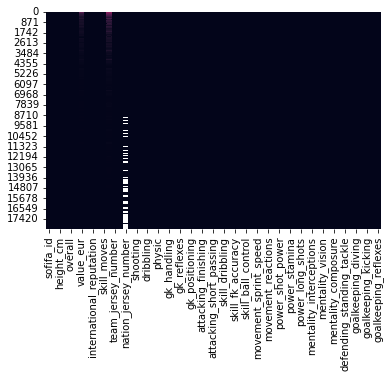

In [ ]:
sns.heatmap(df.select_dtypes(include=['int64','float64']),cbar=False)

In [ ]:
df1 = df.select_dtypes(include=['int64','float64']).dropna(axis=1)

In [ ]:
df1.shape

(18278, 45)

In [ ]:
df1.isnull().sum()

sofifa_id                     0
age                           0
height_cm                     0
weight_kg                     0
overall                       0
potential                     0
value_eur                     0
wage_eur                      0
international_reputation      0
weak_foot                     0
skill_moves                   0
attacking_crossing            0
attacking_finishing           0
attacking_heading_accuracy    0
attacking_short_passing       0
attacking_volleys             0
skill_dribbling               0
skill_curve                   0
skill_fk_accuracy             0
skill_long_passing            0
skill_ball_control            0
movement_acceleration         0
movement_sprint_speed         0
movement_agility              0
movement_reactions            0
movement_balance              0
power_shot_power              0
power_jumping                 0
power_stamina                 0
power_strength                0
power_long_shots              0
mentalit

In [ ]:
from sklearn.preprocessing import StandardScaler
sts = StandardScaler()

In [ ]:
data_est = sts.fit_transform(df1)
data_est

array([[-2.20733585,  1.44233274, -1.68159832, ..., -0.07301019,
        -0.1381906 , -0.48287516],
       [-7.11523177,  1.87180879,  0.83439432, ..., -0.07301019,
        -0.1381906 , -0.31655621],
       [-1.03249096,  0.36864262, -0.94160048, ..., -0.07301019,
        -0.07983402, -0.31655621],
       ...,
       [ 1.16572938, -1.34926158,  0.68639475, ..., -0.3739755 ,
        -0.60504324, -0.15023727],
       [ 1.1220232 , -1.5639996 ,  0.53839519, ..., -0.19339631,
        -0.19654718, -0.20567692],
       [ 0.49035809,  0.15390459,  0.09439648, ..., -0.13320325,
        -0.4299735 , -0.37199586]])

In [ ]:
from sklearn.decomposition import PCA
pca=PCA()

In [ ]:
df_pca_s=pca.fit_transform(data_est)
pca.explained_variance_ratio_*100

array([45.23794797, 12.32973473, 11.44047034,  5.19528589,  4.17656445,
        2.93907694,  2.40843416,  1.84090541,  1.50986906,  1.13904699,
        0.9808188 ,  0.80757092,  0.76263925,  0.69296101,  0.62236919,
        0.58970206,  0.56666365,  0.53643207,  0.53048112,  0.48626773,
        0.43668383,  0.42795286,  0.40177103,  0.36783951,  0.34150893,
        0.30686847,  0.30427346,  0.27804556,  0.26473647,  0.24428046,
        0.22317526,  0.21607671,  0.19193047,  0.16985875,  0.15151505,
        0.14088696,  0.13408366,  0.1249979 ,  0.0918529 ,  0.07849667,
        0.07309752,  0.0656783 ,  0.06510912,  0.05773226,  0.04830614])

In [ ]:
var_cum = np.cumsum(pca.explained_variance_ratio_)*100
var_cum

array([ 45.23794797,  57.5676827 ,  69.00815304,  74.20343893,
        78.38000339,  81.31908033,  83.72751449,  85.5684199 ,
        87.07828897,  88.21733595,  89.19815476,  90.00572567,
        90.76836492,  91.46132593,  92.08369512,  92.67339718,
        93.24006083,  93.7764929 ,  94.30697402,  94.79324175,
        95.22992559,  95.65787845,  96.05964948,  96.42748899,
        96.76899792,  97.07586639,  97.38013985,  97.65818541,
        97.92292188,  98.16720234,  98.3903776 ,  98.60645431,
        98.79838478,  98.96824352,  99.11975857,  99.26064553,
        99.3947292 ,  99.5197271 ,  99.61158001,  99.69007667,
        99.76317419,  99.82885248,  99.8939616 ,  99.95169386,
       100.        ])

 calcule el valor de componentes para la varianza de 90%

In [ ]:
k = np.argmax(var_cum >= 90) + 1
k

12

 calcule el valor de componentes para la varianza de 95%

In [ ]:
k = np.argmax(var_cum >= 95) + 1
k

21

grafique la varianza acumulada para todos los valores de n_components

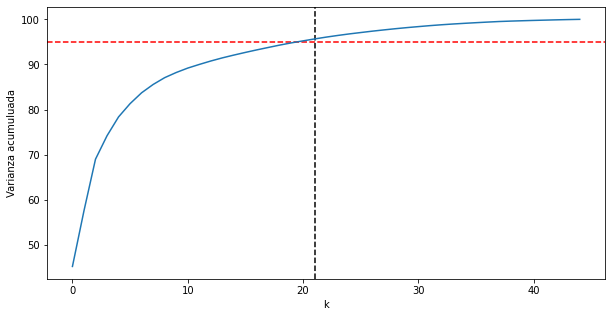

In [ ]:
plt.figure(figsize=(10,5))
plt.axvline(x=k, color='black', linestyle='--')
plt.axhline(y=95, color='red', linestyle='--') #línea horizontal para el 95% de varianza acumuluada
plt.plot(var_cum) #plotear la varianza acumulada
plt.xlabel('k')
plt.ylabel('Varianza acumuluada')
plt.show()

# 1.2. Optimización multidimensional del dataset 
https://raw.githubusercontent.com/apoorva-21/fifa-analysis/master/data/players_20.csv

1.2.1. Obtenga los Skylines (i,e., el frente Pareto) al dataset

Continuamos con la data anterior, ya que es la misma url

Obtenga los Skylines (i,e., el frente Pareto) al dataset con respecto a las 5 primeras dimensiones.

In [ ]:
!pip install paretoset

In [ ]:
from paretoset import paretoset

In [ ]:
#sofifa_id                     0.... no es una variable discreta o continua por eso no se utilizara para este proceso
#age                           0
#height_cm                     0
#weight_kg                     0
#overall                       0
#potential                     0

mask = paretoset(df1[['age','height_cm','weight_kg','overall','potential']], sense=['Max','Max','Max','Max','Max'])
df1_sky_05dim = df1[mask]
df1_sky_05dim

,sofifa_id,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,158023,32,170,72,94,94,95500000,565000,5,4,4,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8
1,20801,34,187,83,93,93,58500000,405000,5,4,5,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11
3,200389,26,188,87,91,93,77500000,125000,3,3,1,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89
6,192448,27,187,85,90,93,67500000,250000,3,4,1,18,14,11,61,14,21,18,12,63,30,38,50,37,86,43,66,79,35,78,10,43,22,11,70,25,70,25,13,10,88,85,88,88,90
7,203376,27,193,92,90,91,78000000,200000,3,3,2,53,52,86,78,45,70,60,70,81,76,74,79,61,88,53,81,90,75,92,64,82,89,47,65,62,89,91,92,85,13,10,13,11,11
10,231747,20,178,73,89,95,93500000,155000,3,4,5,78,89,77,82,79,91,79,63,70,90,96,96,92,89,83,83,76,84,76,79,62,38,89,80,70,84,34,34,32,13,5,7,11,6
11,201024,28,187,89,89,91,67500000,150000,3,3,2,30,22,83,71,14,69,28,28,63,71,69,73,52,86,41,55,81,73,95,15,87,88,35,52,33,82,91,90,87,7,11,7,13,5
14,193080,28,192,82,89,90,56000000,205000,4,3,1,17,13,21,50,13,18,21,19,47,38,57,58,63,87,43,61,67,43,60,12,38,30,12,65,29,68,25,21,13,90,84,81,85,92
16,138956,34,187,85,89,89,24500000,215000,4,3,2,54,33,83,65,45,59,60,31,65,61,61,73,57,82,57,78,89,59,89,49,91,88,28,50,50,84,94,91,89,3,3,2,4,3
19,176580,32,182,86,89,89,53000000,355000,5,4,3,78,91,83,82,90,85,86,82,72,84,76,70,79,92,79,88,69,82,86,86,87,41,92,82,83,85,57,45,38,27,25,31,33,37


In [ ]:
df1_sky_05dim.shape

(58, 45)

Obtenga los Skylines (i,e., el frente Pareto) al dataset con respecto a las 10 primeras dimensiones.

In [ ]:
#sofifa_id                     0.... puede ser una variable categorica, no se utilizara
#age                           0
#height_cm                     0
#weight_kg                     0
#overall                       0
#potential                     0
#value_eur                     0
#wage_eur                      0
#international_reputation      0... puede ser una variable categorica, no se utilizara
#weak_foot                     0
#skill_moves                   0
#attacking_crossing            0

mask = paretoset(df1[['age','height_cm','weight_kg','overall','potential','value_eur','wage_eur','weak_foot','skill_moves','attacking_crossing']], sense=['Max','Max','Max','Max','Max','Max','Max','Max','Max','Max'])
df1_sky_10dim = df1[mask]
df1_sky_10dim

,sofifa_id,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,158023,32,170,72,94,94,95500000,565000,5,4,4,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8
1,20801,34,187,83,93,93,58500000,405000,5,4,5,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11
2,190871,27,175,68,92,92,105500000,290000,5,5,5,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11
3,200389,26,188,87,91,93,77500000,125000,3,3,1,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89
4,183277,28,175,74,91,91,90000000,470000,4,4,4,81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15257,187336,35,196,95,60,60,60000,1000,1,2,1,14,13,16,22,13,12,15,14,38,17,21,31,18,51,26,42,35,42,70,15,45,17,14,34,13,37,20,17,19,62,53,56,58,69
15805,241502,26,201,85,59,60,190000,2000,1,4,2,34,59,50,45,43,58,58,28,27,58,73,78,61,45,56,60,73,40,74,54,30,23,59,57,50,46,22,20,15,9,6,7,10,9
15812,104900,40,189,89,59,59,20000,1000,1,3,1,12,10,10,22,10,9,10,9,25,15,24,28,31,65,37,29,54,29,75,9,37,18,9,39,12,50,7,11,12,53,63,38,62,57
16695,175603,32,197,101,57,57,60000,5000,1,3,1,17,15,14,26,12,13,11,11,23,22,52,54,55,45,28,42,58,15,70,16,37,10,16,33,21,54,28,14,11,63,56,56,56,57


In [ ]:
df1_sky_10dim.shape

(431, 45)

Obtenga los Skylines (i,e., el frente Pareto) al dataset con respecto a las 15 primeras dimensiones.

In [ ]:
#sofifa_id                     0.... puede ser una variable categorica, no se utilizara
#age                           0
#height_cm                     0
#weight_kg                     0
#overall                       0
#potential                     0
#value_eur                     0
#wage_eur                      0
#international_reputation      0... puede ser una variable categorica, no se utilizara
#weak_foot                     0
#skill_moves                   0
#attacking_crossing            0
#attacking_finishing           0
#attacking_heading_accuracy    0
#attacking_short_passing       0
#attacking_volleys             0
#skill_dribbling               0

mask = paretoset(df1[['age','height_cm','weight_kg','overall','potential','value_eur','wage_eur','weak_foot','skill_moves','attacking_crossing','attacking_finishing','attacking_heading_accuracy','attacking_short_passing','attacking_volleys','skill_dribbling']], 
                 sense=['Max','Max','Max','Max','Max','Max','Max','Max','Max','Max','Max','Max','Max','Max','Max'])
df1_sky_15dim = df1[mask]
df1_sky_15dim

,sofifa_id,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,158023,32,170,72,94,94,95500000,565000,5,4,4,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8
1,20801,34,187,83,93,93,58500000,405000,5,4,5,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11
2,190871,27,175,68,92,92,105500000,290000,5,5,5,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11
3,200389,26,188,87,91,93,77500000,125000,3,3,1,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89
4,183277,28,175,74,91,91,90000000,470000,4,4,4,81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15805,241502,26,201,85,59,60,190000,2000,1,4,2,34,59,50,45,43,58,58,28,27,58,73,78,61,45,56,60,73,40,74,54,30,23,59,57,50,46,22,20,15,9,6,7,10,9
15812,104900,40,189,89,59,59,20000,1000,1,3,1,12,10,10,22,10,9,10,9,25,15,24,28,31,65,37,29,54,29,75,9,37,18,9,39,12,50,7,11,12,53,63,38,62,57
15834,208338,31,199,91,59,59,100000,1000,1,2,1,17,18,12,25,15,15,12,18,26,26,24,38,34,49,29,42,51,33,57,20,22,14,12,14,27,13,12,13,18,61,57,56,57,61
16695,175603,32,197,101,57,57,60000,5000,1,3,1,17,15,14,26,12,13,11,11,23,22,52,54,55,45,28,42,58,15,70,16,37,10,16,33,21,54,28,14,11,63,56,56,56,57


In [ ]:
df1_sky_15dim.shape

(656, 45)

¿existe una relacion entre los skyplayers aumentando la cantidad de dimensiones? (i.e., ¿los resultados de a, b y c están relacionados?)

In [ ]:
print(set(df1_sky_05dim.sofifa_id.unique().tolist()).issubset(set(df1_sky_10dim.sofifa_id.unique().tolist())))
print(set(df1_sky_10dim.sofifa_id.unique().tolist()).issubset(set(df1_sky_15dim.sofifa_id.unique().tolist())))

True
True


- Los resultados despues de haber aplicado Skyline de la dataset proporcionada indica que: 

  SkyLine de 05 dimensiones $\subseteq$ SkyLine de 10 dimensiones $\subseteq$ SkyLine de 15 dimensiones

# 1.2.2. Obtenga los Skylines (i,e., el frente Pareto) del PCA aplicado al dataset

https://www.datosabiertos.gob.pe/dataset/midagri-informacion-estadisticas-intenci%C3%B3n-de-siembras/resource/430885d4-fa96-4d66-8c0c

transforme este dataset en transaccional por distrito.

In [ ]:
url2 = 'https://www.datosabiertos.gob.pe/sites/default/files/Estadisticas%20Intension%20de%20Siembra.xlsx'


In [ ]:
siembra = pd.read_excel(url2)
siembra.head()

,DEPARTAMENTO,PROVINICA,DISTRITO,CULTIVO,CAMPANA,AGO,SEP,OCT,NOV,DIC,ENE,FEB,MAR,ABR,MAY,JUN,JUL
0,ANCASH,AIJA,SUCCHA,Papa nativa,2020-2021,0,0,1,0,0,0,0,0,0,0,0,0
1,ANCASH,ANTONIO RAYMONDI,LLAMELLIN,Olluco,2020-2021,0,0,1,0,0,0,0,0,0,0,0,0
2,ANCASH,ANTONIO RAYMONDI,LLAMELLIN,Quinua,2020-2021,0,0,1,0,0,0,0,0,0,0,0,0
3,ANCASH,ANTONIO RAYMONDI,ACZO,Quinua,2020-2021,0,0,1,0,0,0,0,0,0,0,0,0
4,ANCASH,ANTONIO RAYMONDI,CHINGAS,Olluco,2020-2021,0,0,1,0,0,0,0,0,0,0,0,0


Transaccional Dataset (0.5 puntos) transforme este dataset en transaccional por distrito.

In [ ]:
siembra['UBICACION'] = siembra.DEPARTAMENTO + '-' +siembra.PROVINICA + '-'+ siembra.DISTRITO
siembra

,DEPARTAMENTO,PROVINICA,DISTRITO,CULTIVO,CAMPANA,AGO,SEP,OCT,NOV,DIC,ENE,FEB,MAR,ABR,MAY,JUN,JUL,UBICACION
0,ANCASH,AIJA,SUCCHA,Papa nativa,2020-2021,0,0,1,0,0,0,0,0,0,0,0,0,ANCASH-AIJA-SUCCHA
1,ANCASH,ANTONIO RAYMONDI,LLAMELLIN,Olluco,2020-2021,0,0,1,0,0,0,0,0,0,0,0,0,ANCASH-ANTONIO RAYMONDI-LLAMELLIN
2,ANCASH,ANTONIO RAYMONDI,LLAMELLIN,Quinua,2020-2021,0,0,1,0,0,0,0,0,0,0,0,0,ANCASH-ANTONIO RAYMONDI-LLAMELLIN
3,ANCASH,ANTONIO RAYMONDI,ACZO,Quinua,2020-2021,0,0,1,0,0,0,0,0,0,0,0,0,ANCASH-ANTONIO RAYMONDI-ACZO
4,ANCASH,ANTONIO RAYMONDI,CHINGAS,Olluco,2020-2021,0,0,1,0,0,0,0,0,0,0,0,0,ANCASH-ANTONIO RAYMONDI-CHINGAS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12176,ANCASH,RECUAY,TAPACOCHA,Cebada grano,2020-2021,0,0,0,0,0,4,5,0,0,0,0,0,ANCASH-RECUAY-TAPACOCHA
12177,ANCASH,RECUAY,TAPACOCHA,Haba grano seco,2020-2021,0,0,0,0,0,3,4,0,0,0,0,0,ANCASH-RECUAY-TAPACOCHA
12178,ANCASH,RECUAY,TAPACOCHA,Trigo,2020-2021,0,0,0,0,0,3,5,0,0,0,0,0,ANCASH-RECUAY-TAPACOCHA
12179,ANCASH,SANTA,MACATE,Haba grano seco,2020-2021,0,0,0,0,0,3,2,0,0,0,0,0,ANCASH-SANTA-MACATE


In [ ]:
siembra_trans_dist = siembra.copy()
siembra_trans_dist = siembra_trans_dist[['UBICACION','CULTIVO']]
siembra_trans_dist

,UBICACION,CULTIVO
0,ANCASH-AIJA-SUCCHA,Papa nativa
1,ANCASH-ANTONIO RAYMONDI-LLAMELLIN,Olluco
2,ANCASH-ANTONIO RAYMONDI-LLAMELLIN,Quinua
3,ANCASH-ANTONIO RAYMONDI-ACZO,Quinua
4,ANCASH-ANTONIO RAYMONDI-CHINGAS,Olluco
...,...,...
12176,ANCASH-RECUAY-TAPACOCHA,Cebada grano
12177,ANCASH-RECUAY-TAPACOCHA,Haba grano seco
12178,ANCASH-RECUAY-TAPACOCHA,Trigo
12179,ANCASH-SANTA-MACATE,Haba grano seco


In [ ]:
def to_transactional(df,column_trans,column_items):
  transactions = []
  for v in df[column_trans].unique():
    transactions.append(list(df[df[column_trans] == v][column_items].values))
  return transactions
#By Willy Ugarte

In [ ]:
trans_dist = to_transactional(siembra_trans_dist, 'UBICACION', 'CULTIVO')
print(len(trans_dist))

1503


In [ ]:
trans_dist

Transaccional Dataset - transforme este dataset en transaccional por provincia.

In [ ]:
siembra['UBICACION_PROV'] = siembra.DEPARTAMENTO + '-' +siembra.PROVINICA


In [ ]:
siembra_trans_prov = siembra.copy()
siembra_trans_prov = siembra_trans_prov[['UBICACION_PROV','CULTIVO']]

In [ ]:
trans_prov = to_transactional(siembra_trans_prov, 'UBICACION_PROV', 'CULTIVO')
print(len(trans_prov))

175


Transaccional Dataset - transforme este dataset en transaccional por departamento.

In [ ]:
siembra_trans_dep = siembra.copy()
siembra_trans_dep = siembra_trans_dep[['DEPARTAMENTO','CULTIVO']]

In [ ]:
trans_dep = to_transactional(siembra_trans_dep, 'DEPARTAMENTO', 'CULTIVO')
print(len(trans_dep))

23


# 2.2. Emerging Patterns

divida el dataset en 2 clases según región (Puno vs resto del páis).

In [ ]:
siembra['DEPARTAMENTO'].unique()

array(['ANCASH', 'APURIMAC', 'AREQUIPA', 'CAJAMARCA', 'HUANCAVELICA',
       'HUANUCO', 'JUNIN', 'LIMA', 'MOQUEGUA', 'PUNO', 'CUSCO', 'ICA',
       'PIURA', 'AMAZONAS', 'LA LIBERTAD', 'PASCO', 'TACNA', 'TUMBES',
       'LAMBAYEQUE', 'UCAYALI', 'MADRE DE DIOS', 'LORETO', 'SAN MARTIN'],
      dtype=object)

In [ ]:
siembra_puno = siembra[siembra['DEPARTAMENTO']=='PUNO']

In [ ]:
siembra_puno

In [ ]:
siembra_resto = siembra[siembra['DEPARTAMENTO']!='PUNO']

de Puno al resto del país:

extraiga los itemsets emergentes usando el growth-rate que aparezcan al menos 1 vez en la data de Puno al resto

In [ ]:
siembra_trans_puno = siembra_puno.copy()
siembra_trans_puno = siembra_trans_puno[['UBICACION','CULTIVO']]

In [ ]:
siembra_trans_resto = siembra_resto.copy()
siembra_trans_resto = siembra_trans_resto[['UBICACION','CULTIVO']]

In [ ]:
trans_puno = to_transactional(siembra_trans_puno, 'UBICACION', 'CULTIVO')
trans_resto = to_transactional(siembra_trans_resto, 'UBICACION', 'CULTIVO')

In [ ]:
def all_itemsets(trans_, supp_):
  #calcular los itemsets frecuentes con soporte mínimo supp_
  #reportando su frecuencia absoluta 'a' y relativa 'S'
  r = fpgrowth(trans_, supp=supp_, report='aS')
  df_items = pd.DataFrame(r) #transformar el resultado en dataframe
  df_items.columns = ['Itemset','Freq','Freq(%)']#cambiar encabezados de las columnas
  df_items.sort_values(by='Freq',ascending=False,inplace=True) #ordenar descendentemente por frecuencia
  df_items['Size'] = [len(x) for x in df_items.Itemset.tolist()]
  df_items['Itemset'] = [str(sorted(x)) for x in df_items.Itemset.tolist()]
  return df_items

#By Willy Ugarte  

In [ ]:
#Vamos a aplicarle un support de 10
df_itemsets_puno = all_itemsets(trans_puno, 10)
df_itemsets_resto = all_itemsets(trans_resto, 10)

In [ ]:
df_itemsets_puno

In [ ]:
emerging = df_itemsets_puno.join(df_itemsets_resto.set_index('Itemset'),
                                  on='Itemset',lsuffix='_p',rsuffix='_r',how='outer').fillna(0)
emerging['GrowthRate_p'] = (emerging['Freq(%)_p']/emerging['Freq(%)_r'])
emerging.sort_values(by='GrowthRate_p',ascending=False,inplace=True)
emerging

,Itemset,Freq_p,Freq(%)_p,Size_p,Freq_r,Freq(%)_r,Size_r,GrowthRate_p
418.0,"['Cebolla cabeza roja', 'Haba grano seco', 'Ma...",18.0,17.475728,6.0,0.0,0.000000,0.0,inf
311.0,"['Cebada grano', 'Cebolla cabeza roja', 'Papa ...",26.0,25.242718,4.0,0.0,0.000000,0.0,inf
506.0,"['Cebolla cabeza roja', 'Maiz amilaceo']",25.0,24.271845,2.0,0.0,0.000000,0.0,inf
505.0,"['Cebolla cabeza roja', 'Maiz amilaceo', 'Papa...",25.0,24.271845,3.0,0.0,0.000000,0.0,inf
504.0,"['Cebolla cabeza roja', 'Haba grano seco', 'Ma...",25.0,24.271845,3.0,0.0,0.000000,0.0,inf
...,...,...,...,...,...,...,...,...
NaN,"['Arveja grano verde', 'Cebada grano', 'Haba g...",0.0,0.000000,0.0,214.0,15.285714,6.0,0.0
NaN,"['Arveja grano seco', 'Arveja grano verde', 'H...",0.0,0.000000,0.0,214.0,15.285714,6.0,0.0
NaN,"['Arveja grano seco', 'Cebada grano', 'Frijol ...",0.0,0.000000,0.0,214.0,15.285714,6.0,0.0
NaN,"['Arveja grano seco', 'Cebada grano', 'Haba gr...",0.0,0.000000,0.0,214.0,15.285714,5.0,0.0


In [ ]:
emerging[emerging.Freq_p > 1] ## Respuesta

,Itemset,Freq_p,Freq(%)_p,Size_p,Freq_r,Freq(%)_r,Size_r,GrowthRate_p
418.0,"['Cebolla cabeza roja', 'Haba grano seco', 'Ma...",18.0,17.475728,6.0,0.0,0.000000,0.0,inf
311.0,"['Cebada grano', 'Cebolla cabeza roja', 'Papa ...",26.0,25.242718,4.0,0.0,0.000000,0.0,inf
506.0,"['Cebolla cabeza roja', 'Maiz amilaceo']",25.0,24.271845,2.0,0.0,0.000000,0.0,inf
505.0,"['Cebolla cabeza roja', 'Maiz amilaceo', 'Papa...",25.0,24.271845,3.0,0.0,0.000000,0.0,inf
504.0,"['Cebolla cabeza roja', 'Haba grano seco', 'Ma...",25.0,24.271845,3.0,0.0,0.000000,0.0,inf
...,...,...,...,...,...,...,...,...
189.0,"['Maiz amilaceo', 'Trigo']",23.0,22.330097,2.0,675.0,48.214286,2.0,0.463143
526.0,['Maiz amarillo duro'],16.0,15.533981,1.0,673.0,48.071429,1.0,0.323144
529.0,"['Frijol grano seco', 'Maiz amilaceo']",11.0,10.679612,2.0,468.0,33.428571,2.0,0.319476
528.0,"['Frijol grano seco', 'Maiz amarillo duro']",11.0,10.679612,2.0,518.0,37.000000,2.0,0.288638


de Puno al resto del país

extraiga los Jumping Emerging Patterns (JEP) si existeran

In [ ]:
emerging[emerging.GrowthRate_p == np.inf] ## Respuesta

,Itemset,Freq_p,Freq(%)_p,Size_p,Freq_r,Freq(%)_r,Size_r,GrowthRate_p
418.0,"['Cebolla cabeza roja', 'Haba grano seco', 'Ma...",18.0,17.475728,6.0,0.0,0.0,0.0,inf
311.0,"['Cebada grano', 'Cebolla cabeza roja', 'Papa ...",26.0,25.242718,4.0,0.0,0.0,0.0,inf
506.0,"['Cebolla cabeza roja', 'Maiz amilaceo']",25.0,24.271845,2.0,0.0,0.0,0.0,inf
505.0,"['Cebolla cabeza roja', 'Maiz amilaceo', 'Papa...",25.0,24.271845,3.0,0.0,0.0,0.0,inf
504.0,"['Cebolla cabeza roja', 'Haba grano seco', 'Ma...",25.0,24.271845,3.0,0.0,0.0,0.0,inf
...,...,...,...,...,...,...,...,...
508.0,"['Cebolla cabeza roja', 'Haba grano seco']",34.0,33.009709,2.0,0.0,0.0,0.0,inf
257.0,"['Cebolla cabeza roja', 'Olluco', 'Papa nativa']",32.0,31.067961,3.0,0.0,0.0,0.0,inf
255.0,"['Cebolla cabeza roja', 'Haba grano seco', 'Ol...",32.0,31.067961,4.0,0.0,0.0,0.0,inf
345.0,"['Arveja grano seco', 'Cebada grano', 'Cebolla...",18.0,17.475728,5.0,0.0,0.0,0.0,inf


del resto del país a Puno:

extraiga los itemsets emergentes usando el growth-rate que aparezcan al menos 1 vez en la data del resto a Puno


In [ ]:
emerging['GrowthRate_r'] = (emerging['Freq(%)_r']/emerging['Freq(%)_p'])

In [ ]:
emerging[emerging.Freq_r > 1] ## Respuesta

,Itemset,Freq_p,Freq(%)_p,Size_p,Freq_r,Freq(%)_r,Size_r,GrowthRate_p,GrowthRate_r
15.0,"['Olluco', 'Papa nativa', 'Quinua']",78.0,75.728155,3.0,243.0,17.357143,3.0,4.362939,0.229203
21.0,"['Cebada grano', 'Olluco', 'Papa nativa', 'Qui...",76.0,73.786408,4.0,240.0,17.142857,4.0,4.304207,0.232331
29.0,"['Papa nativa', 'Quinua']",82.0,79.611650,2.0,266.0,19.000000,2.0,4.190087,0.238659
27.0,"['Cebada grano', 'Papa nativa', 'Quinua']",79.0,76.699029,3.0,259.0,18.500000,3.0,4.145893,0.241203
17.0,"['Haba grano seco', 'Olluco', 'Papa nativa', '...",67.0,65.048544,4.0,231.0,16.500000,4.0,3.942336,0.253657
...,...,...,...,...,...,...,...,...,...
NaN,"['Arveja grano verde', 'Cebada grano', 'Haba g...",0.0,0.000000,0.0,214.0,15.285714,6.0,0.000000,inf
NaN,"['Arveja grano seco', 'Arveja grano verde', 'H...",0.0,0.000000,0.0,214.0,15.285714,6.0,0.000000,inf
NaN,"['Arveja grano seco', 'Cebada grano', 'Frijol ...",0.0,0.000000,0.0,214.0,15.285714,6.0,0.000000,inf
NaN,"['Arveja grano seco', 'Cebada grano', 'Haba gr...",0.0,0.000000,0.0,214.0,15.285714,5.0,0.000000,inf


del resto del país a Puno:

extraiga los Jumping Emerging Patterns (JEP) si existeran

In [ ]:
emerging[emerging.GrowthRate_r == np.inf] ## Respuesta

,Itemset,Freq_p,Freq(%)_p,Size_p,Freq_r,Freq(%)_r,Size_r,GrowthRate_p,GrowthRate_r
NaN,"['Arveja grano seco', 'Cebada grano', 'Maiz ch...",0.0,0.0,0.0,168.0,12.000000,5.0,0.0,inf
NaN,"['Arveja grano seco', 'Cebada grano', 'Maiz am...",0.0,0.0,0.0,168.0,12.000000,6.0,0.0,inf
NaN,"['Arveja grano seco', 'Arveja grano verde', 'P...",0.0,0.0,0.0,167.0,11.928571,4.0,0.0,inf
NaN,"['Arveja grano seco', 'Arveja grano verde', 'C...",0.0,0.0,0.0,167.0,11.928571,6.0,0.0,inf
NaN,"['Arveja grano verde', 'Frijol grano seco', 'H...",0.0,0.0,0.0,167.0,11.928571,6.0,0.0,inf
...,...,...,...,...,...,...,...,...,...
NaN,"['Arveja grano verde', 'Cebada grano', 'Haba g...",0.0,0.0,0.0,214.0,15.285714,6.0,0.0,inf
NaN,"['Arveja grano seco', 'Arveja grano verde', 'H...",0.0,0.0,0.0,214.0,15.285714,6.0,0.0,inf
NaN,"['Arveja grano seco', 'Cebada grano', 'Frijol ...",0.0,0.0,0.0,214.0,15.285714,6.0,0.0,inf
NaN,"['Arveja grano seco', 'Cebada grano', 'Haba gr...",0.0,0.0,0.0,214.0,15.285714,5.0,0.0,inf


# 2.3. Skypatterns:

extraiga los skypatterns para {freq,size} donde size es el tamaño de los itemsets, es decir la cantidad de items que contienen del resultado de la pregunta 2.2b

In [ ]:
emerging['Freq'] = emerging['Freq_p'] + emerging['Freq_r']

In [ ]:
emerging['Size'] = [len(x) for x in emerging.Itemset.values]

In [ ]:
emerging['Area'] = emerging.Freq * emerging.Size

In [ ]:
emerging

In [ ]:
mask = paretoset(emerging[['Freq','Size']],sense=['max','max'])
sky_itemsets = emerging[mask]
print(sky_itemsets.shape)
sky_itemsets

(29, 13)


,Itemset,Freq_p,Freq(%)_p,Size_p,Freq_r,Freq(%)_r,Size_r,GrowthRate_p,GrowthRate_r,Area_p,Freq,Size,Area
12.0,"['Cebada grano', 'Haba grano seco']",71.0,68.932039,35,590.0,42.142857,2.0,1.635675,0.611368,2485.0,661.0,35,23135.0
140.0,"['Cebada grano', 'Haba grano seco', 'Maiz amil...",28.0,27.184466,52,557.0,39.785714,3.0,0.683272,1.463546,1456.0,585.0,52,30420.0
244.0,"['Arveja grano seco', 'Cebada grano', 'Haba gr...",21.0,20.388350,82,420.0,30.000000,5.0,0.679612,1.471429,1722.0,441.0,82,36162.0
254.0,['Maiz amilaceo'],40.0,38.834951,17,886.0,63.285714,1.0,0.613645,1.629607,680.0,926.0,17,15742.0
183.0,"['Cebada grano', 'Haba grano seco', 'Maiz amil...",23.0,22.330097,61,531.0,37.928571,4.0,0.588741,1.698540,1403.0,554.0,61,33794.0
141.0,"['Cebada grano', 'Maiz amilaceo']",28.0,27.184466,33,673.0,48.071429,2.0,0.565502,1.768342,924.0,701.0,33,23133.0
185.0,"['Cebada grano', 'Maiz amilaceo', 'Trigo']",23.0,22.330097,42,632.0,45.142857,3.0,0.494654,2.021615,966.0,655.0,42,27510.0
530.0,['Frijol grano seco'],11.0,10.679612,21,737.0,52.642857,1.0,0.202869,4.929286,231.0,748.0,21,15708.0
NaN,"['Arveja grano seco', 'Arveja grano verde', 'C...",0.0,0.000000,143,161.0,11.500000,9.0,0.000000,inf,0.0,161.0,143,23023.0
NaN,"['Arveja grano seco', 'Arveja grano verde', 'C...",0.0,0.000000,148,142.0,10.142857,9.0,0.000000,inf,0.0,142.0,148,21016.0


extraiga los skypatterns para {freq,size,growth-rate} donde growth-rate es la métrica para calcular los emerging patterns de la pregunta 2.2b

In [ ]:
mask_3d = paretoset(emerging[['Freq','Size','GrowthRate_p']],sense=['max','max','max'])
sky_itemsets_3d = emerging[mask_3d]
print(sky_itemsets_3d.shape)
sky_itemsets_3d

(118, 13)


,Itemset,Freq_p,Freq(%)_p,Size_p,Freq_r,Freq(%)_r,Size_r,GrowthRate_p,GrowthRate_r,Area_p,Freq,Size,Area
439.0,"['Arveja grano seco', 'Cebada grano', 'Cebolla...",20.0,19.417476,121,0.0,0.000000,0.0,inf,0.0,2420.0,20.0,121,2420.0
291.0,"['Cebada grano', 'Cebolla cabeza roja', 'Haba ...",24.0,23.300971,102,0.0,0.000000,0.0,inf,0.0,2448.0,24.0,102,2448.0
447.0,"['Arveja grano seco', 'Cebada grano', 'Cebolla...",19.0,18.446602,131,0.0,0.000000,0.0,inf,0.0,2489.0,19.0,131,2489.0
331.0,"['Arveja grano seco', 'Cebada grano', 'Cebolla...",22.0,21.359223,104,0.0,0.000000,0.0,inf,0.0,2288.0,22.0,104,2288.0
323.0,"['Arveja grano seco', 'Cebada grano', 'Cebolla...",21.0,20.388350,114,0.0,0.000000,0.0,inf,0.0,2394.0,21.0,114,2394.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaN,"['Arveja grano seco', 'Cebada grano', 'Haba gr...",0.0,0.000000,107,341.0,24.357143,7.0,0.0,inf,0.0,341.0,107,36487.0
NaN,"['Arveja grano seco', 'Cebada grano', 'Haba gr...",0.0,0.000000,111,293.0,20.928571,7.0,0.0,inf,0.0,293.0,111,32523.0
NaN,"['Arveja grano seco', 'Cebada grano', 'Haba gr...",0.0,0.000000,126,228.0,16.285714,8.0,0.0,inf,0.0,228.0,126,28728.0
NaN,"['Arveja grano seco', 'Cebada grano', 'Haba gr...",0.0,0.000000,127,218.0,15.571429,8.0,0.0,inf,0.0,218.0,127,27686.0


grafique en 3D todos los skypatterns de la pregunta 3.3b

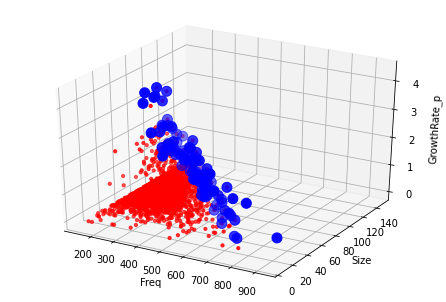

In [ ]:
fig = plt.figure()
#crear ejes en 3D para la figura
ax = Axes3D(fig)
#poner etiquetas
ax.set_xlabel('Freq')
ax.set_ylabel('Size')
ax.set_zlabel('GrowthRate_p')
#dispersión de los puntos
ax.scatter(emerging.Freq,
           emerging.Size,
           emerging.GrowthRate_p,
           color='r',s=10)#color rojo tamaño 10
ax.scatter(sky_itemsets_3d.Freq,
           sky_itemsets_3d.Size,
           sky_itemsets_3d.GrowthRate_p,
           color='b',s=100)#color azul tamaño 100
plt.show()